# Recommendation System

A movie recommendation system is a tool that suggests movies to users based on various factors such as their viewing history, preferences, and similarities to other movies. The goal of a recommendation system is to predict and provide personalized recommendations to enhance the user's viewing experience.

In this project, we have developed a movie recommendation system using a dataset that includes movie details like titles, genres, overviews, and more. The recommendation process involves several steps:

1. **Data Preprocessing**: Cleaning and preparing the data for analysis.
2. **Feature Extraction**: Using techniques like TF-IDF Vectorization to convert text data into numerical features.
3. **Dimensionality Reduction**: Applying Singular Value Decomposition (SVD) to reduce the number of features while retaining important information.
4. **Similarity Calculation**: Calculating the similarity between movies using cosine similarity on the reduced feature space.
5. **Generating Recommendations**: Based on the similarity scores, suggesting movies that are most similar to the selected movie.

This approach helps in efficiently finding and recommending movies that align with the user's interests, providing a more engaging and personalized viewing experience.


# Code Explanation

## Libraries and Modules
This section below imports necessary libraries and modules:

- **pandas**: A powerful data manipulation library used for data analysis and handling.
- **TfidfVectorizer** from `sklearn.feature_extraction.text`: Converts a collection of raw documents to a matrix of TF-IDF features.
- **TruncatedSVD** from `sklearn.decomposition`: Performs dimensionality reduction using truncated Singular Value Decomposition (SVD).
- **cosine_similarity** from `sklearn.metrics.pairwise`: Computes the cosine similarity between two vectors, which is a measure of similarity between two non-zero cosine_similarity


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

## Data Loading


The datasets used in this project are loaded using `pandas`.

[Dataset link](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.dits.csv')


In [2]:
# Load the movies dataset
dataset = pd.read_csv('Data/tmdb_5000_movies.csv')
# Load the credits dataset
data_credits = pd.read_csv('Data/tmdb_5000_credits.csv')


In [3]:
# Display the first 2 rows of the movies dataset
dataset.head(2)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
data_credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
# Get the dimensions of the movies dataset (rows, columns)
dataset.shape


(4803, 20)

In [6]:
# Get the dimensions of the credits dataset (rows, columns)
data_credits.shape


(4803, 4)

## Data Preprocessing

Data preprocessing is a crucial step in building an effective recommendation system. It involves cleaning and preparing the data to ensure that it is suitable for analysis. The preprocessing steps include:

1. **Merging Datasets**: Combining the movie metadata and credits datasets on a common column (e.g., `movie_id`).
2. **Selecting Relevant Columns**: Extracting only the necessary columns such as `movie_id`, `title`, `overview`, `genres`, `keywords`, `cast`, and `crew`.
3. **Handling Missing Values**: Identifying and filling or removing missing values to ensure the dataset is complete.
4. **Creating Tags**: Combining relevant columns into a single text column (`tag`) that contains a summary of important information for each movie. This column will be used for feature extraction.
5. **Text Preprocessing**: Converting text to lowercase, removing punctuation, and applying stemming to reduce words to their rootta['tag'] = data['tag'].apply(stem_text)


In [7]:
# Merge the movies dataset and credits dataset on the 'title' column
dataset = dataset.merge(data_credits, on='title')


In [8]:
dataset.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
dataset.shape

(4809, 23)

In [10]:
# Keeping important columns for recommendation
dataset = dataset[['movie_id','title','overview','genres','keywords','cast','crew']]

In [11]:
dataset.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [12]:
dataset.shape

(4809, 7)

In [13]:
# Calculate the number of missing values in each column of the merged dataset
dataset.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [14]:
pip install missingno

In [15]:
import missingno as msno
import matplotlib.pyplot as plt


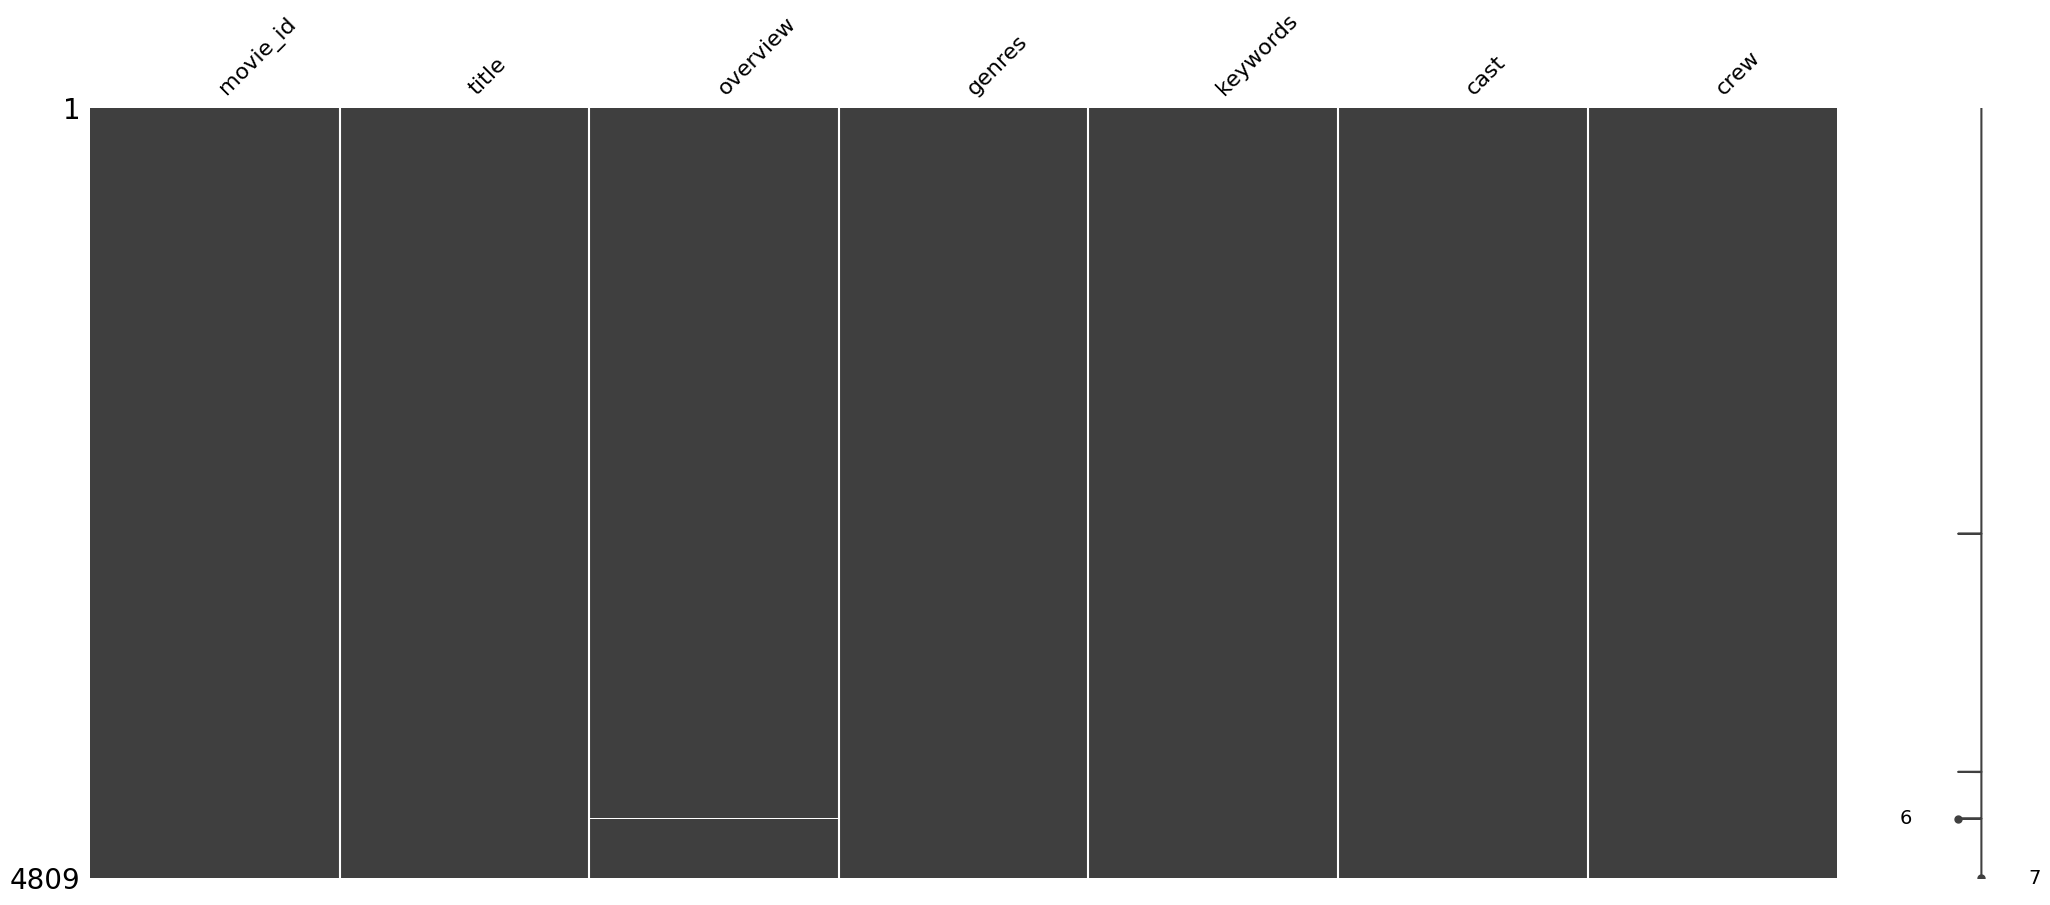

In [16]:
# Visualize missing values as a matrix
msno.matrix(dataset)
plt.show()


In [17]:
# Drop rows with any missing values from the dataset
dataset.dropna(inplace=True)


In [18]:
dataset.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [19]:
# Count the number of duplicated rows in the dataset
dataset.duplicated().sum()


0

In [20]:
# handle genres
dataset.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [21]:
import ast #for converting str to list

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [22]:
import ast  # Importing ast for converting str to list

def convert(text):
    # Use list comprehension to extract 'name' from each dictionary in the evaluated list
    return [item['name'] for item in ast.literal_eval(text)]

In [23]:
# Apply the convert function to the 'genres' column in the dataset
dataset['genres'] = dataset['genres'].apply(convert)

In [24]:
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [25]:
# handle keywords
dataset.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [26]:
dataset['keywords'] = dataset['keywords'].apply(convert)
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
# handle cast
dataset.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [28]:
print(dataset['cast'].head())


0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object


In [29]:
import ast  # Importing ast for converting str to list

# Function to extract names of top 3 cast members
def convert_cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter += 1
    return L

In [30]:
dataset['cast'] = dataset['cast'].apply(convert_cast)
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [31]:
# handle crew

dataset.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [32]:
import ast  # Importing ast for converting str to list

# Function to fetch the director's name
def fetch_director(movie_credits_text):
    director_names = []
    for credit in ast.literal_eval(movie_credits_text):
        if credit['job'] == 'Director':
            director_names.append(credit['name'])
            break  # Stop searching after finding the first director
    return director_names

In [33]:
dataset['crew'] = dataset['crew'].apply(fetch_director)

In [34]:
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [35]:
# handle overview (converting to list)

dataset.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [36]:
# Split each string in the 'overview' column into a list of words
dataset['overview'] = dataset['overview'].apply(lambda x: x.split())
# Display a random sample of 4 rows from the dataset
dataset.sample(4)

,movie_id,title,overview,genres,keywords,cast,crew
3764,9782,The Night Listener,"[In, the, midst, of, his, crumbling, relations...","[Drama, Thriller]","[radio station, radio presenter, radio transmi...","[Toni Collette, Robin Williams, Joe Morton]",[Patrick Stettner]
763,17332,The Soloist,"[A, Los, Angeles, journalist, befriends, a, ho...",[Drama],"[newspaper, cello, musical, violin, los angeles]","[Robert Downey Jr., Jamie Foxx, Catherine Keener]",[Joe Wright]
1381,8843,The Cell,"[A, psychotherapist, journeys, inside, a, coma...","[Horror, Science Fiction, Thriller]","[drowning, therapist, virtual reality, serial ...","[Jennifer Lopez, Vincent D'Onofrio, Vince Vaughn]",[Tarsem Singh]
398,298,Ocean's Thirteen,"[Danny, Ocean's, team, of, criminals, are, bac...","[Crime, Thriller]","[casino, thief, revenge, heist, las vegas, pre...","[George Clooney, Brad Pitt, Matt Damon]",[Steven Soderbergh]


In [37]:
dataset.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [38]:

# Function to remove spaces from each string in a list
def remove_space(word_list):
    cleaned_list = []
    for word in word_list:
        cleaned_list.append(word.replace(" ", ""))
    return cleaned_list

In [39]:
dataset['cast'] = dataset['cast'].apply(remove_space)
dataset['crew'] = dataset['crew'].apply(remove_space)
dataset['genres'] = dataset['genres'].apply(remove_space)
dataset['keywords'] = dataset['keywords'].apply(remove_space)

In [40]:
dataset.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [41]:
# Concatinate all
dataset['tags'] = dataset['overview'] + dataset['genres'] + dataset['keywords'] + dataset['cast'] + dataset['crew']

In [42]:
dataset.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [43]:
# droping those extra columns
new_df = dataset[['movie_id','title','tags']]

In [44]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [45]:
# Converting list to str
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10412\3674298559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [46]:
new_df.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [47]:
# Converting to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10412\3444714728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [48]:
new_df.iloc[0]['tags']

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [49]:
import nltk
from nltk.stem import PorterStemmer

In [50]:
ps = PorterStemmer()

In [51]:
def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [52]:
new_df['tags'] = new_df['tags'].apply(stems)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_10412\3973021881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stems)


In [53]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

## TF-IDF Vectorization

Term Frequency-Inverse Document Frequency (TF-IDF) Vectorization is used to convert the textual data into numerical features that can be used for similarity calculations. This step helps in transforming the `tags` column into a matrix of TF-IDF features.

TF-IDF Vectorization works by emphasizing words that are more significant within a specific document while downplaying words that are common across all documents. This ensures that unique and important words have higher weights, contributing more to the similarity calculatitfidf = Tfid


In [54]:
# Step 1: TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

## SVD for Dimensionality Reduction

Singular Value Decomposition (SVD) is used to reduce the dimensionality of the TF-IDF matrix. This step helps in capturing the essential patterns in the data while reducing computational complexity. By reducing the number of dimensions, we retain the most important information and remove noise.

In this process, we specify the number of components (dimensions) to keep. This reduced representation still captures the similarities and relationships between movies effectiv(tfidf_matrix)


In [55]:
# Step 2: SVD for Dimensionality Reduction
n_components = 50  # Number of dimensions to keep
svd = TruncatedSVD(n_components=n_components)
svd_matrix = svd.fit_transform(tfidf_matrix)

## Calculate Cosine Similarity on the Reduced Matrix

After reducing the dimensionality of the TF-IDF matrix using SVD, we calculate the cosine similarity between the movies. Cosine similarity measures the cosine of the angle between two non-zero vectors, providing a measure of similarity between the movies based on their reduced feature representations. The cosine similarity values range from -1 to 1, where 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect dissimilarityd_matrix)


In [56]:
# Step 3: Calculate cosine similarity on the reduced matrix
cosine_sim = cosine_similarity(svd_matrix, svd_matrix)

In [57]:
# Function to get movie recommendations
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in dataset['title'].values:
        return f"The movie '{title}' does not exist in the dataset."
    
    idx = dataset[dataset['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # Get top 5 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return dataset.iloc[movie_indices]['title'].tolist()

## Evaluation of Movie Recommendation System

### Precision@5 Evaluation

This evaluation assesses the Precision@5 metric for a movie recommendation system. It calculates how many of the top 5 recommended movies match the true recommendations for each test case. The `precision_at_k` function iterates over predefined test cases, retrieves recommendations, and computes the precision score. The final result, Precision@5, indicates the average precision across all test cases.


In [58]:
# List of test cases with known good recommendations
test_cases = {
    'The Dark Knight Rises': ['Batman & Robin', 'The Dark Knight', 'Batman Begins', 'Batman Forever', 'Batman'],
    # Add more test cases as needed
}

def precision_at_k(test_cases, k=5):
    precisions = []
    for title, true_recommendations in test_cases.items():
        recommended_movies = get_recommendations(title)[:k]
        num_relevant = len(set(recommended_movies) & set(true_recommendations))
        precision = num_relevant / k
        precisions.append(precision)
    return sum(precisions) / len(precisions)

# Calculate Precision@5
precision = precision_at_k(test_cases, k=5)
print(f'Precision@5: {precision}')


Precision@5: 1.0


In [59]:
# Example usage
recommended_movies = get_recommendations('Batman Begins')
print("Recommended movies:", recommended_movies)

Recommended movies: ['The Dark Knight', 'Batman & Robin', 'Batman Forever', 'The Dark Knight Rises', 'Batman']


In [60]:
# Example usage
recommended_movies = get_recommendations('The Dark Knight Rises')
print("Recommended movies:", recommended_movies)

Recommended movies: ['Batman & Robin', 'The Dark Knight', 'Batman Forever', 'Batman Begins', 'Batman']


## Saving Model Data with Pickle

To store model data for future use, the `pickle` module is used. This process involves serializing a DataFrame (`new_df`) and a similarity object (`similarity`) into separate `.pkl` files. These files are saved under the `savedModel` directory for later retrieval and reuse.


In [61]:
import pickle

In [63]:
pickle.dump(new_df,open('saved/movie_list.pkl','wb'))
pickle.dump(cosine_sim,open('saved/similarity.pkl','wb'))